In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sarracen as src
import numpy as np

# Initial Setup

In [3]:
sdf = src.read_csv('../Data/results/kelvin_helmholtz/initial.csv')
sdf.params={'mass':0.001}
sdf

,x,y,vx,vy,u,h,rho
0,0.000,0.000,-0.381092,0.000000,3.351481,0.05,1.118908
1,0.025,0.000,-0.381092,0.015643,3.351481,0.05,1.118908
2,0.050,0.000,-0.381092,0.030902,3.351481,0.05,1.118908
3,0.075,0.000,-0.381092,0.045399,3.351481,0.05,1.118908
4,0.100,0.000,-0.381092,0.058779,3.351481,0.05,1.118908
...,...,...,...,...,...,...,...
1595,0.875,0.975,-0.358577,-0.070711,3.285373,0.05,1.141423
1596,0.900,0.975,-0.358577,-0.058779,3.285373,0.05,1.141423
1597,0.925,0.975,-0.358577,-0.045399,3.285373,0.05,1.141423
1598,0.950,0.975,-0.358577,-0.030902,3.285373,0.05,1.141423


<Axes: xlabel='x', ylabel='y'>

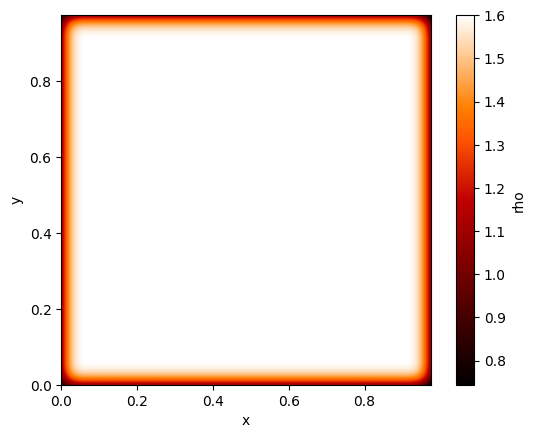

In [4]:
sdf.render('rho', xsec=1.0)

# Final Setup

In [5]:
sdft = src.read_csv('../Data/results/kelvin_helmholtz/final.csv')
sdft.params={'mass':0.001}
sdft

,x,y,vx,vy,u,h,rho
0,0.999758,0.999998,0.327387,-0.022585,3.924693,0.036741,0.666719
1,0.005861,0.999997,-1.236160,-0.025435,3.644170,0.044306,0.458469
2,0.041169,0.000006,-0.408878,0.052597,3.418414,0.037795,0.630035
3,0.065786,0.999997,-0.524501,0.054612,3.648267,0.035058,0.732249
4,0.091975,0.000019,-0.340617,0.004143,3.779218,0.030406,0.973470
...,...,...,...,...,...,...,...
1595,0.866741,0.979635,-0.389149,0.265929,3.125756,0.029981,1.001254
1596,0.891474,0.979933,-0.407129,0.283971,3.132037,0.026898,1.243954
1597,0.916221,0.980460,-0.359270,0.320067,3.098726,0.027042,1.230767
1598,0.941425,0.981309,-0.289333,0.378855,2.868633,0.030398,0.974001


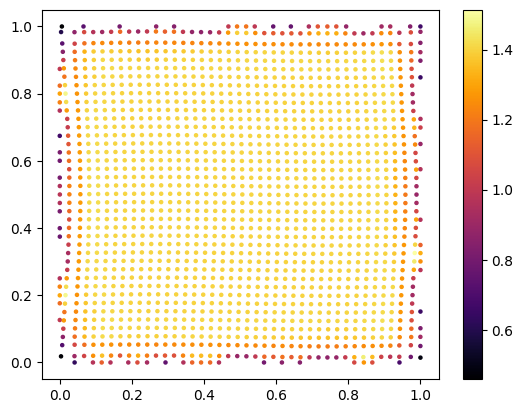

In [6]:
sdft.params={'mass':0.001}
plt.scatter(sdft['x'], sdft['y'], c=sdft['rho'], cmap='inferno', s=5)
plt.colorbar()
#plt.clim(1.0, 2.0)
plt.show()

# Angular Momentum's Conservation

In [7]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [10]:
T = 604
time = range(0, T)
ang_mom = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/kelvin_helmholtz/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))

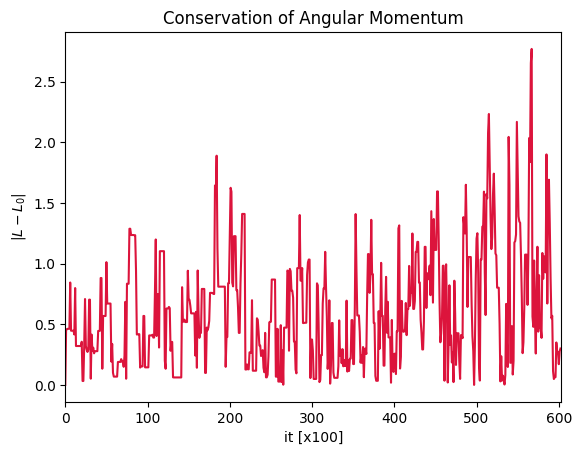

In [11]:
plt.plot(time[:-1], np.abs(ang_mom[:-1]-ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel("$|L-L_0|$")
plt.xlim(0, T-1)
plt.show()

# Conservation of Energy

In [12]:
# Energy
def energy(vx, vy, u):
    return 0.5*(vx*vx + vy*vy)+u

In [14]:
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/kelvin_helmholtz/' + str(ii) + ".csv")
    energ[ii-1] = np.sum(energy(df['vx'], df['vy'], df['u']))

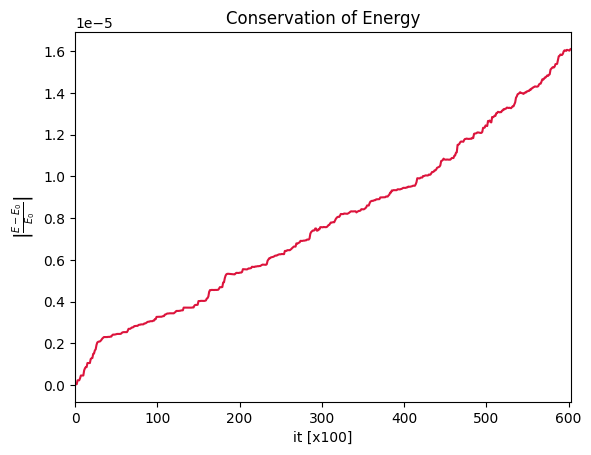

In [15]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='crimson')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T-1)
plt.show()